In [15]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


## leading Indicator

In [16]:
import pandas as pd

leadingIndicator = pd.read_csv('./leadingIndicator.csv')  # monthly 지표
leadingIndicator = leadingIndicator.set_index('DATE')
leadingIndicator.index = pd.to_datetime(leadingIndicator.index)
leadingIndicator

,USALOLITONOSTSAM
DATE,
1960-01-31,100.694793
1960-02-29,100.421437
1960-03-31,100.118775
1960-04-30,99.832664
1960-05-31,99.582618
...,...
2023-05-31,99.093665
2023-06-30,99.196542
2023-07-31,99.301570


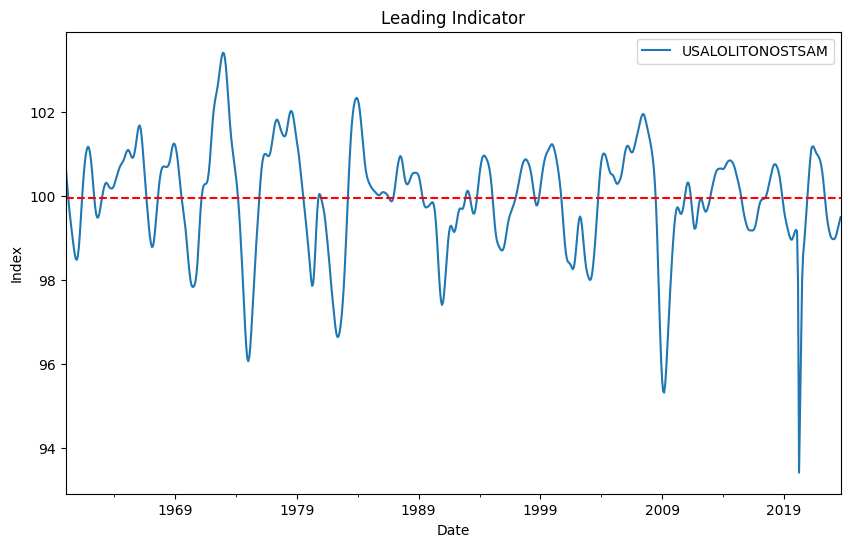

In [17]:
import matplotlib.pyplot as plt

# leadingIndicator 데이터프레임에 대한 그래프 그리기
leadingIndicator.plot(figsize=(10, 6)) # figsize는 그래프의 크기를 조정합니다.

# 그래프 타이틀과 축 라벨 설정
plt.title('Leading Indicator')
plt.xlabel('Date')
plt.ylabel('Index')

# 데이터의 평균 계산
leadingIndicator_mean = leadingIndicator['USALOLITONOSTSAM'].mean()

# 평균을 나타내는 수평선 추가
plt.axhline(y = leadingIndicator_mean, color='r', linestyle='--')

# 그래프 표시
plt.show()

## Risk Appetite : VIX

In [18]:
vix = pd.read_csv('./vix.csv')  # monthly 지표
vix = vix.set_index('DATE')
vix.index = pd.to_datetime(vix.index)
vix

,VIXCLS
DATE,
1990-01-31,23.347273
1990-02-28,23.262632
1990-03-31,20.062273
1990-04-30,21.403500
1990-05-31,18.097727
...,...
2023-07-31,13.932381
2023-08-31,15.853913
2023-09-30,15.173333


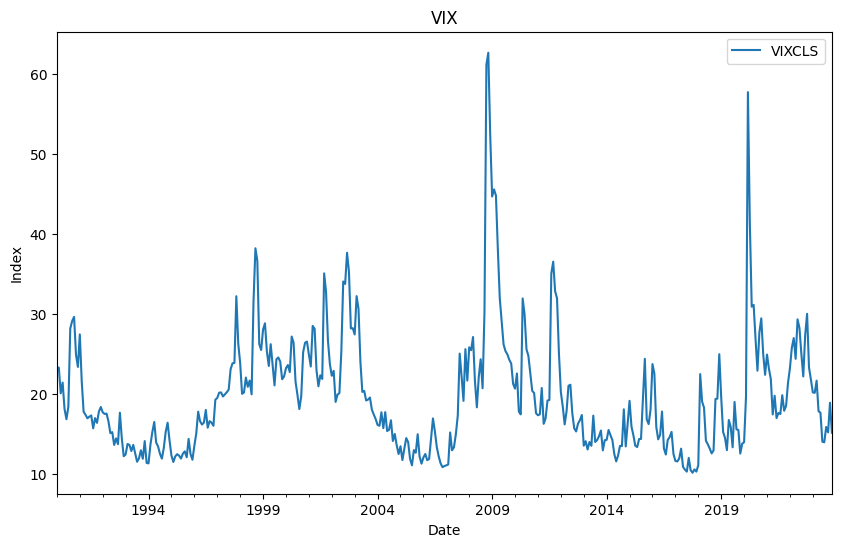

In [19]:
# vix 데이터프레임에 대한 그래프 그리기
vix.plot(figsize=(10, 6)) # figsize는 그래프의 크기를 조정합니다.

# 그래프 타이틀과 축 라벨 설정
plt.title('VIX')
plt.xlabel('Date')
plt.ylabel('Index')

# 그래프 표시
plt.show()

## GDP

In [20]:
import pandas as pd

gdp = pd.read_csv('./gdp.csv')  # monthly 지표
gdp = gdp.set_index('DATE')
gdp.index = pd.to_datetime(gdp.index)
gdp

,USALORSGPNOSTSAM
DATE,
1990-01-31,101.347724
1990-02-28,101.369278
1990-03-31,101.363418
1990-04-30,101.318411
1990-05-31,101.226002
...,...
2023-01-31,99.860089
2023-02-28,99.885841
2023-03-31,99.906923


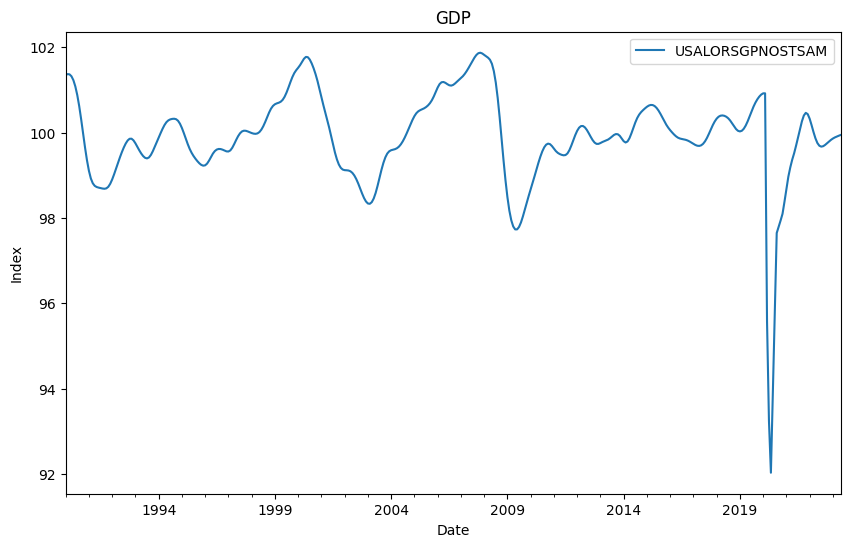

In [21]:
# gdp 데이터프레임에 대한 그래프 그리기
gdp.plot(figsize=(10, 6)) # figsize는 그래프의 크기를 조정합니다.

# 그래프 타이틀과 축 라벨 설정
plt.title('GDP')
plt.xlabel('Date')
plt.ylabel('Index')

# 데이터의 평균 계산
vix_mean = gdp['USALORSGPNOSTSAM'].mean()

# 그래프 표시
plt.show()

In [22]:
# indicator & vix & gdp 합치기
table = pd.concat([leadingIndicator, vix, gdp], axis=1, join='inner')
table.columns = ['leadingIndicator', 'vix', 'gdp']
table

,leadingIndicator,vix,gdp
DATE,,,
1990-01-31,99.815403,23.347273,101.347724
1990-02-28,99.842501,23.262632,101.369278
1990-03-31,99.841537,20.062273,101.363418
1990-04-30,99.773369,21.403500,101.318411
1990-05-31,99.618592,18.097727,101.226002
...,...,...,...
2023-01-31,98.971317,20.169048,99.860089
2023-02-28,98.964919,20.120500,99.885841
2023-03-31,98.975283,21.644348,99.906923


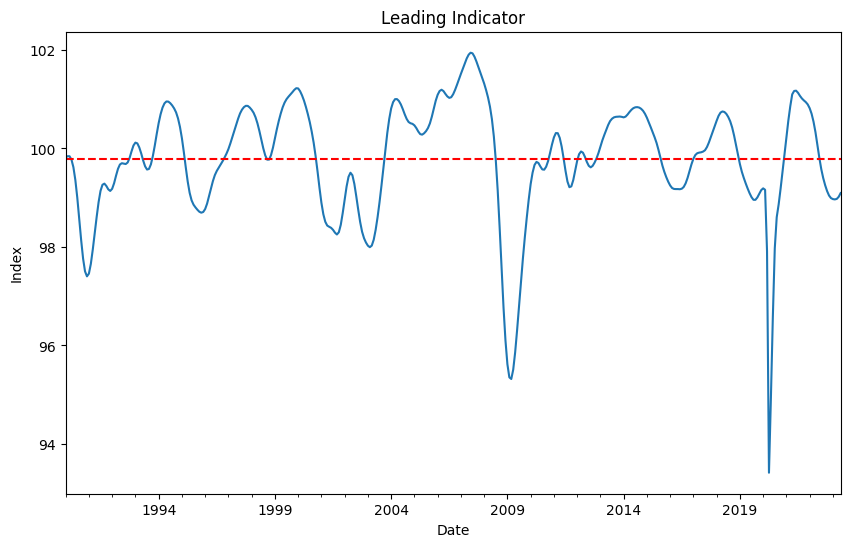

In [23]:
# leadingIndicator 데이터프레임에 대한 그래프 그리기
table['leadingIndicator'].plot(figsize=(10, 6)) # figsize는 그래프의 크기를 조정합니다.

# 그래프 타이틀과 축 라벨 설정
plt.title('Leading Indicator')
plt.xlabel('Date')
plt.ylabel('Index')

# 데이터의 평균 계산
leadingIndicator_mean = table['leadingIndicator'].mean()

# 평균을 나타내는 수평선 추가
plt.axhline(y = leadingIndicator_mean, color='r', linestyle='--')

# 그래프 표시
plt.show()

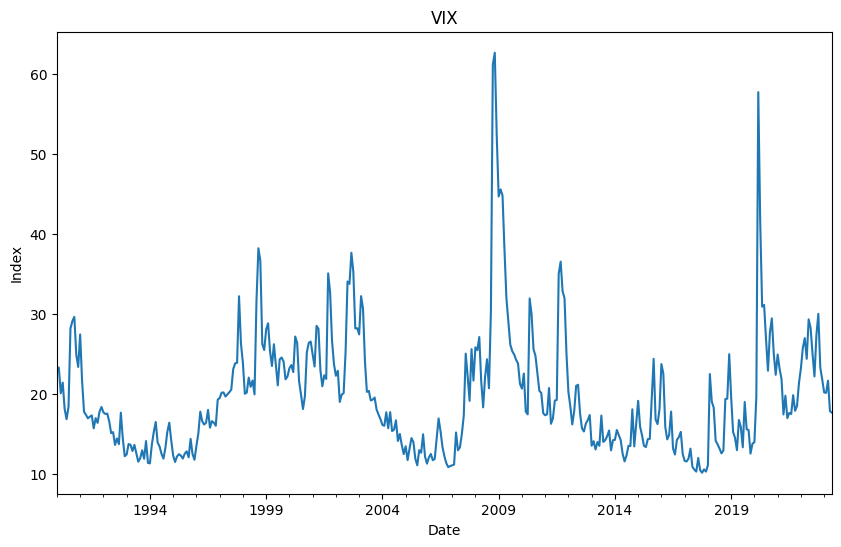

In [24]:
# vix 데이터프레임에 대한 그래프 그리기
table['vix'].plot(figsize=(10, 6)) # figsize는 그래프의 크기를 조정합니다.

# 그래프 타이틀과 축 라벨 설정
plt.title('VIX')
plt.xlabel('Date')
plt.ylabel('Index')

# 그래프 표시
plt.show()

⇒ 2가지 지표 사용 

1) leading economic indicators : long term trend(수치 평균)에 비해 위에 있는지 아래에 있는지 확인

2) global risk appetite (vix) : 상승구간인지 하락구간인지 확인 -> vix(변동성 지표)를 사용하므로 수치 올라갈수록 시장이 불안정(-, 하락구간), 낮아질수록 시장이 안정(+, 상승구간)이라고 생각하면 됨

⇒ 위 2개 지표를 합치면 ***maco regime framework(4가지 국면)***

In [25]:
# leading indicator

# 구간을 저장할 리스트
above_average_periods = []
below_average_periods = []

# 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
current_start = None
current_end = None
current_status_above = None

# 데이터프레임 순회
for date, value in table['leadingIndicator'].items():
    # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
    if current_status_above is None or (value > leadingIndicator_mean) != current_status_above:
        # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
        if current_start is not None and current_end is not None:
            if current_status_above:
                above_average_periods.append((current_start, current_end))
            else:
                below_average_periods.append((current_start, current_end))

        # 새로운 구간의 시작 날짜 설정
        current_start = date
        current_status_above = value > leadingIndicator_mean

    # 현재 구간의 끝 날짜 업데이트
    current_end = date

# 마지막 구간 추가
if current_status_above:
    above_average_periods.append((current_start, current_end))
else:
    below_average_periods.append((current_start, current_end))


# 결과 출력 - 평균 이상
above_average = []
for start, end in above_average_periods:
    above_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("평균 이상인 구간:", above_average)

# 결과 출력 - 평균 이하
below_average = []
for start, end in below_average_periods:
    below_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("\n평균 이하인 구간:", below_average)


평균 이상인 구간: ['1990-01-31 ~ 1990-03-31', '1992-10-31 ~ 1993-04-30', '1993-10-31 ~ 1995-02-28', '1996-11-30 ~ 1998-08-31', '1998-11-30 ~ 2000-10-31', '2003-10-31 ~ 2008-06-30', '2010-11-30 ~ 2011-06-30', '2012-02-29 ~ 2012-05-31', '2012-11-30 ~ 2015-08-31', '2017-01-31 ~ 2018-12-31', '2020-12-31 ~ 2022-06-30']

평균 이하인 구간: ['1990-04-30 ~ 1992-09-30', '1993-05-31 ~ 1993-09-30', '1995-03-31 ~ 1996-10-31', '1998-09-30 ~ 1998-10-31', '2000-11-30 ~ 2003-09-30', '2008-07-31 ~ 2010-10-31', '2011-07-31 ~ 2012-01-31', '2012-06-30 ~ 2012-10-31', '2015-09-30 ~ 2016-12-31', '2019-01-31 ~ 2020-11-30', '2022-07-31 ~ 2023-05-31']


In [28]:
# vix

# 120일 이동평균 계산
table['vix_120d_ma'] = table['vix'].rolling(window=120).mean()

# 구간을 저장할 리스트 초기화
increasing_periods = []
decreasing_periods = []

# 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
current_start = None
current_end = None
current_trend_increasing = None

# 데이터프레임 순회
for date, row in table.iterrows():
    value = row['vix']
    moving_average = row['vix_120d_ma']
    
    # 이동 평균과 비교
    if moving_average is not None:
        # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
        if current_trend_increasing is None or (value < moving_average) != current_trend_increasing:
            # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
            if current_start is not None and current_end is not None:
                if current_trend_increasing:
                    increasing_periods.append((current_start, current_end))
                else:
                    decreasing_periods.append((current_start, current_end))

            # 새로운 구간의 시작 날짜 설정
            current_start = date
            current_trend_increasing = value < moving_average

        # 현재 구간의 끝 날짜 업데이트
        current_end = date

# 마지막 구간 추가
if current_trend_increasing:
    increasing_periods.append((current_start, current_end))
else:
    decreasing_periods.append((current_start, current_end))

# 결과 출력 - 상승 구간
increasing = []
for start, end in increasing_periods:
    increasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("상승 중인 구간:", increasing)

# 결과 출력 - 하락 구간
decreasing = []
for start, end in decreasing_periods:
    decreasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("\n하락 중인 구간:", decreasing)


상승 중인 구간: ['2000-08-31 ~ 2000-08-31', '2002-03-31 ~ 2002-03-31', '2003-05-31 ~ 2007-07-31', '2007-10-31 ~ 2007-10-31', '2008-05-31 ~ 2008-05-31', '2008-08-31 ~ 2008-08-31', '2009-12-31 ~ 2010-01-31', '2010-03-31 ~ 2010-04-30', '2010-10-31 ~ 2011-07-31', '2012-01-31 ~ 2015-08-31', '2015-10-31 ~ 2015-12-31', '2016-03-31 ~ 2018-01-31', '2018-03-31 ~ 2018-09-30', '2019-02-28 ~ 2019-07-31', '2019-09-30 ~ 2020-01-31', '2021-04-30 ~ 2021-04-30', '2021-06-30 ~ 2021-08-31', '2023-04-30 ~ 2023-05-31']

하락 중인 구간: ['1990-01-31 ~ 2000-07-31', '2000-09-30 ~ 2002-02-28', '2002-04-30 ~ 2003-04-30', '2007-08-31 ~ 2007-09-30', '2007-11-30 ~ 2008-04-30', '2008-06-30 ~ 2008-07-31', '2008-09-30 ~ 2009-11-30', '2010-02-28 ~ 2010-02-28', '2010-05-31 ~ 2010-09-30', '2011-08-31 ~ 2011-12-31', '2015-09-30 ~ 2015-09-30', '2016-01-31 ~ 2016-02-29', '2018-02-28 ~ 2018-02-28', '2018-10-31 ~ 2019-01-31', '2019-08-31 ~ 2019-08-31', '2020-02-29 ~ 2021-03-31', '2021-05-31 ~ 2021-05-31', '2021-09-30 ~ 2023-03-31']


----------

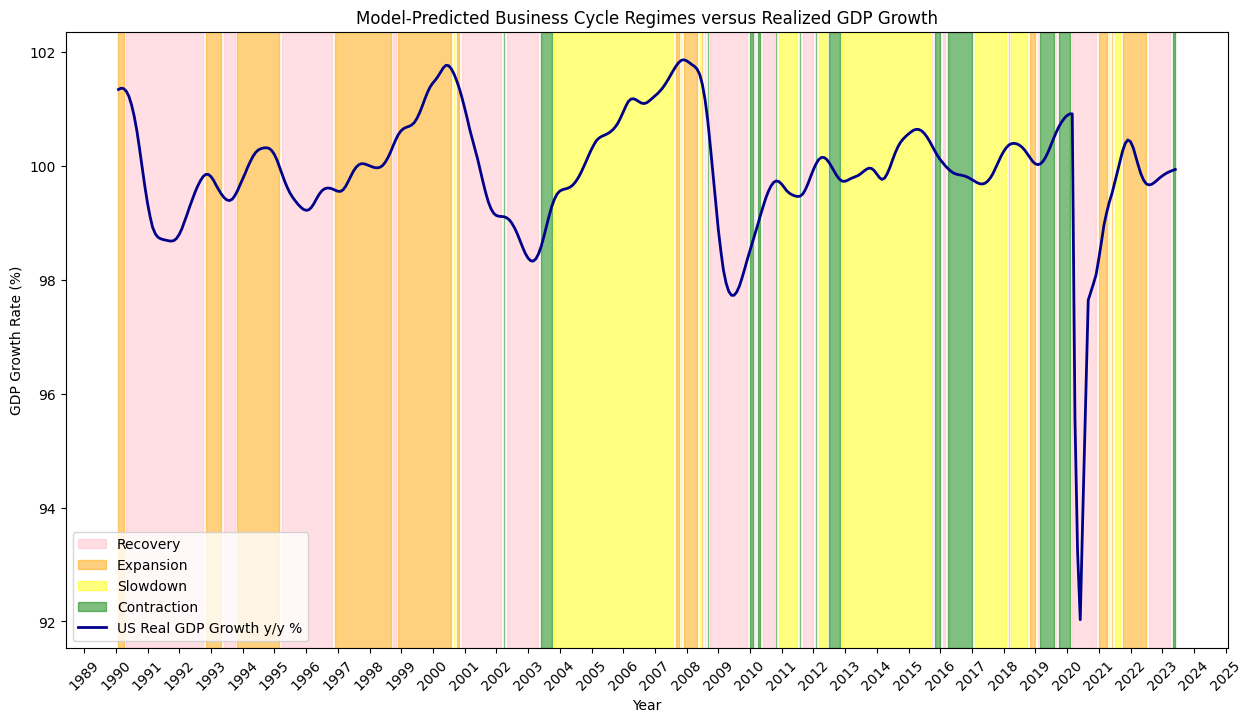

In [36]:
# 나머지 코드는 동일하게 유지 (위에서 제공된 코드)

# 그래프 생성 및 국면별 배경색 추가
fig, ax = plt.subplots(figsize=(15, 8))

# 국면별 색상 지정
colors = {
    'Recovery': 'pink',
    'Expansion': 'orange',
    'Slowdown': 'yellow',
    'Contraction': 'green'
}

# 국면 별로 배경색을 그래프에 추가
for period in recovery_periods:
    ax.axvspan(period[0], period[1], color=colors['Recovery'], alpha=0.5, label='Recovery' if 'Recovery' not in ax.get_legend_handles_labels()[1] else "")
for period in expansion_periods:
    ax.axvspan(period[0], period[1], color=colors['Expansion'], alpha=0.5, label='Expansion' if 'Expansion' not in ax.get_legend_handles_labels()[1] else "")
for period in slowdown_periods:
    ax.axvspan(period[0], period[1], color=colors['Slowdown'], alpha=0.5, label='Slowdown' if 'Slowdown' not in ax.get_legend_handles_labels()[1] else "")
for period in contraction_periods:
    ax.axvspan(period[0], period[1], color=colors['Contraction'], alpha=0.5, label='Contraction' if 'Contraction' not in ax.get_legend_handles_labels()[1] else "")

# GDP 성장률 선 그래프 추가
ax.plot(gdp_growth.index, gdp_growth, color='darkblue', label='US Real GDP Growth y/y %', linewidth=2)

# 범례 추가
ax.legend()

# 제목과 라벨 설정
ax.set_title('Model-Predicted Business Cycle Regimes versus Realized GDP Growth')
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth Rate (%)')

# x축을 연도로 표시
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# x축 라벨 각도 조절
plt.xticks(rotation=45)

# 그래프 표시
plt.show()
